# Customer Churn Prediction Project: Comprehensive Analysis and Modeling

**Overview:**

This notebook consolidates the full data science process applied to predicting customer churn for Syriatel. The primary goal is to identify patterns that distinguish churned from non-churned customers, enabling proactive intervention to retain valuable clients. This notebook is structured into three key sections:

1. **Exploratory Data Analysis (EDA)** - This section inspects the dataset, uncovers patterns, and identifies key variables that could influence customer churn. Visualizations are included to illustrate distributions, correlations, and any initial observations.

2. **Data Preprocessing** - Here, we refine the dataset by handling missing values, scaling features, and addressing class imbalance. Additionally, any unnecessary columns are removed, and relevant features are formatted to prepare for model input.

3. **Modeling and Evaluation** - This final section involves building and fine-tuning machine learning models, beginning with a baseline model and advancing to a tuned decision tree model, selected based on evaluation metrics aligned with business objectives. We assess each model on accuracy, precision, recall, and F1-score to select the optimal model for predicting churn.

By combining these steps into one notebook, this document provides a complete narrative and technical walk-through, showcasing the development of a predictive churn model from data exploration to final evaluation.

***

## Exploratory Data Analysis of SyriaTel Customer Churn Dataset

### Data Loading and Initial Overview

Understanding the structure and characteristics of the dataset is an essential first step in the data science process. By examining the data types, dimensions, and basic statistics of each feature, we identify data quality issues and gain insights into potential data preprocessing needs.

Key Steps:
- Loaded the dataset and used `df.info()` and `df.describe()` to review data types, null values, and summary statistics.

Key Observations:
- **Data Quality Check**: No null values were detected, meaning no imputation was required, streamlining the preprocessing phase.
- **Feature Ranges and Types**: The data includes a mix of numerical and categorical features, requiring specific handling during preprocessing to ensure compatibility with machine learning models.
- **Informative Statistics**: Initial summary statistics showed differences in scale among features (e.g., `total_day_charge` vs. `customer_service_calls`), indicating a need for scaling prior to modeling.

This overview informed our preprocessing strategy and feature engineering approach, as we prepared to address both scaling and encoding for categorical features.

***

### Target Variable Analysis: `churn`

Understanding the distribution of the target variable, `churn`, is crucial since it indicates whether a customer has churned or remained. Analyzing the class distribution helps us prepare for modeling challenges related to class imbalance.

Key Observations:
- **Significant Class Imbalance**: There is a substantial imbalance between churned and non-churned classes, with far fewer churn cases. This can impact the model's ability to effectively identify churners.
- **Modeling Implications**: The imbalance suggests a need for resampling techniques, such as SMOTE or class-weight adjustments, to ensure the model is effective at capturing churn cases.
- **Evaluation Considerations**: Precision, recall, and F1-score will be particularly important metrics, especially recall for churn cases, as the business priority is to identify potential churners accurately.

This understanding of class imbalance shapes our evaluation strategy and guides decisions for model tuning.

***

### Feature Exploration: Categorical and Numerical Features

Exploring both categorical and numerical features provides insights into their distributions, ranges, and potential relationships with churn. This informs feature selection and identifies patterns that may contribute to customer churn.

Key Observations:
- **Influential Categorical Features**: The `international_plan` and `voice_mail_plan` features show potential relationships with churn, suggesting that subscription choices may impact churn likelihood.
- **Numerical Features with Predictive Potential**: Higher `customer_service_calls` appears correlated with churn, indicating potential customer dissatisfaction.
- **Next Steps for Modeling**: These relationships guide us in feature selection and may influence feature engineering efforts, such as creating new interaction terms or transforming specific variables.

These insights provide a basis for selecting features and developing additional feature engineering strategies in the preprocessing phase.

***

### Correlation Matrix for Numerical Features

A correlation matrix allows us to assess relationships between numerical features, helping to spot multicollinearity, which may affect certain model types.

Key Observations:
- **High Correlation Between Charges and Minutes**: Variables like `total_day_minutes` and `total_day_charge` are strongly correlated, as expected. This redundancy suggests that we might consider dimensionality reduction techniques for models sensitive to multicollinearity.
- **Minimal Correlation with Churn**: No single numerical feature shows a strong linear correlation with `churn`, indicating the need for non-linear methods or combinations of features to predict churn effectively.

The correlation analysis directs our attention to potential feature selection considerations, particularly for linear models, and reinforces the importance of advanced model types in capturing complex patterns.

***

### Summary of Initial Findings and Next Steps

The exploratory data analysis (EDA) provides several insights that shape our preprocessing and modeling strategies:

Key Observations:
- **Class Imbalance in Target Variable**: The target variable (`churn`) has a noticeable class imbalance, underscoring the need for resampling techniques to enhance model performance on churn cases.
- **Feature Relevance**: Variables like `customer_service_calls` and `international_plan` show potential relationships with churn, highlighting their significance for predictive modeling.
- **Feature Correlations**: Strong correlations between certain numerical features, such as `total_day_minutes` and `total_day_charge`, inform potential dimensionality reduction or careful selection in certain models.

Next Steps:
These insights drive our preprocessing approach, guiding feature engineering choices and model selection strategies for optimal performance.

***

## Preprocessing of the SyriaTel Customer Churn Dataset

In this notebook, I prepared the dataset for modeling by addressing irrelevant columns, encoding categorical variables, scaling the features, and splitting the data into training and test sets. This process ensures that the data is in optimal format for machine learning algorithms.

***

### Column Standardization and Irrelevant Feature Removal

To streamline the modeling process, we standardize column names for consistency and remove columns that do not provide predictive value, enhancing the dataset’s clarity and usability.

Key Steps:
- Converted column names to lowercase with underscores for uniformity.
- Dropped `state` and `phone_number` columns as they do not contribute predictive value.

Key Observations:
- **Improved Readability**: Consistent column formatting makes referencing easier and enhances the dataset's readability across the pipeline.
- **Noise Reduction**: Removing unnecessary columns helps the model focus on informative features, potentially improving model performance by reducing data complexity.

This step lays the foundation for effective feature engineering and data transformation in the next stages.

***

### Categorical Data Encoding

Categorical features are transformed into numerical representations, making them suitable for model training.

Key Steps:
- Applied label encoding to binary categorical features (`international_plan` and `voice_mail_plan`), assigning 1 for `yes` and 0 for `no`.

Key Observations:
- **Compatibility with ML Models**: Encoding categorical variables allows seamless integration with machine learning algorithms, which generally require numerical input.
- **Retained Interpretability**: Binary encoding maintains interpretability, making it clear which category each encoded value represents.

This step ensures compatibility with the chosen models and preserves the interpretive value of categorical features.

***

### Addressing Class Imbalance

To handle the imbalance in the target variable `churn`, we implement techniques that improve the model’s sensitivity to the minority class, which represents churned customers.

Key Steps:
- Applied class-weight adjustment and SMOTE during model training to increase recall for churn cases.

Key Observations:
- **Improved Recall for Churn Cases**: Addressing class imbalance allows the model to capture more churn cases, aligning with the business need to identify at-risk customers.
- **Impact on Model Evaluation**: With SMOTE, we monitor precision-recall trade-offs to ensure the model remains effective for both classes.

By addressing class imbalance, we aim to enhance the model's ability to predict customer churn more accurately.

***

### Feature Scaling and Data Splitting

Scaling and splitting the data prepares it for model training, ensuring feature values are on the same scale and allowing unbiased evaluation.

Key Steps:
- Applied `StandardScaler` to normalize numerical features.
- Split the data into training and test sets using an 80/20 split.

Key Observations:
- **Consistency in Feature Scales**: Scaling helps prevent certain features from disproportionately influencing the model, particularly relevant for distance-based algorithms.
- **Unbiased Model Evaluation**: A dedicated test set ensures that we evaluate model performance on unseen data, providing an accurate measure of generalization.

These steps are essential to prepare the dataset for reliable and interpretable model training and testing.

***

### Preprocessing Summary and Transition to Modeling

The preprocessing notebook completes the data preparation process, ensuring the dataset is optimized for the modeling phase.

Key Steps:
1. Standardized column names and removed irrelevant columns.
2. Encoded categorical variables.
3. Scaled numerical features.
4. Split data into training and test sets.

Key Observations:
- **Prepared Data for Modeling**: Comprehensive preprocessing minimizes data inconsistencies and improves model interpretability.
- **Enhanced Data Quality**: These steps are foundational for building effective models and ensuring reliable evaluation.

With preprocessing complete, the data is now ready for the modeling phase, where we will explore various algorithms to predict customer churn.

***

## Modeling and Evaluation Objectives

The objective of this notebook is to build and evaluate machine learning models to predict customer churn, assisting the Customer Retention Team in identifying at-risk customers.

Key Steps:
- Establish a baseline model using Logistic Regression.
- Evaluate model performance with metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Apply hyperparameter tuning to improve model performance.

Key Observations:
- Establishing a robust baseline model allows comparison and highlights the need for tuning.
- Using multiple evaluation metrics provides a comprehensive understanding of model effectiveness.

***

### Baseline Logistic Regression Model

The baseline model provides an initial benchmark for predicting customer churn, using Logistic Regression without any adjustments.

Key Steps:
- Built a Logistic Regression model to assess its performance on the original data.
- Evaluated the model's performance metrics, focusing on accuracy, precision, and recall.

Key Observations:
- **High Accuracy, Low Recall**: The baseline model achieved high accuracy but struggled with recall for the churn class.
- **Impact of Class Imbalance**: Low recall for churners suggests that the model favors the majority class, underscoring the need for techniques to handle class imbalance.

Findings:
The baseline performance indicates a need for adjustments to improve recall for churn cases, guiding our choice of models and balancing techniques.

***

### Logistic Regression with Class Balancing

To improve the model’s performance on churn cases, we implement class-weight balancing in Logistic Regression, giving more weight to the minority class.

Key Steps:
- Applied class-weight adjustment to the Logistic Regression model to address the class imbalance.
- Evaluated the model using the adjusted class weights, focusing on recall for churn cases.

Key Observations:
- **Improved Recall for Churn**: The class-weight adjustment increased recall, capturing more churn cases.
- **Trade-Off with Precision**: Higher recall comes with a slight decrease in precision, highlighting the trade-off between these metrics.

Findings:
Class-weight balancing enhances the model’s sensitivity to churn cases, aligning with the goal of predicting at-risk customers more accurately.

***

### Logistic Regression with SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is applied to further address the class imbalance, creating synthetic samples for the minority class to improve recall.

Key Steps:
- Used SMOTE to generate synthetic samples for the churn class in the training data.
- Evaluated the model’s performance after training on the SMOTE-augmented data.

Key Observations:
- **Enhanced Recall**: SMOTE improves recall for churn cases, making the model more effective at identifying potential churners.
- **Stable Overall Performance**: SMOTE provides a balanced approach to class imbalance, resulting in improvements without significantly impacting other metrics.

Findings:
The SMOTE-adjusted model yields better recall and captures more churn cases, improving the model's effectiveness in identifying customers at risk of churning.

***

### Fine-Tuning the Decision Threshold for Logistic Regression

To improve the model's ability to identify churners, we adjusted the decision threshold for the Logistic Regression model, optimizing the balance between recall and precision.

Key Steps:
- Tested different threshold values (e.g., 0.5, 0.45, and 0.4) to observe changes in recall and precision.
- Selected an optimal threshold (0.4) that increases recall for churners, aligning with business goals.

Key Observations:
- **Enhanced Recall at Lower Threshold**: Adjusting the threshold to 0.4 led to a notable improvement in recall for churn cases, capturing more at-risk customers.
- **Trade-Off in Precision**: Although precision slightly decreased, this approach allows flexibility in prioritizing recall, which is valuable for proactive churn prevention.

Findings:
Threshold tuning enables fine control over model sensitivity to churn cases, offering a tailored approach to meet specific business objectives.

***

### Evaluating ROC Curve and AUC for Model Discrimination

To assess the model's ability to distinguish between churners and non-churners, the ROC curve and AUC score were analyzed.

Key Steps:
- Plotted the ROC curve for the tuned Logistic Regression model.
- Calculated the AUC (Area Under the Curve) to evaluate model performance in distinguishing between the two classes.

Key Observations:
- **AUC Score of 0.83**: The AUC of 0.83 indicates that the model has a good discriminatory ability, successfully distinguishing between churners and non-churners.
- **Support for Threshold Tuning**: The high AUC score validates the effectiveness of threshold tuning, demonstrating that the model’s adjustments yield reliable performance for churn prediction.

Findings:
The ROC and AUC evaluations confirm the model’s robustness, reinforcing its potential as a predictive tool for identifying customers at risk of churning.

***

### Decision Tree Model

A Decision Tree model is built to capture complex relationships in the data, providing an interpretable and flexible model for churn prediction.

Key Steps:
- Created a Decision Tree model with default parameters.
- Evaluated the model’s performance, observing metrics such as accuracy, precision, and recall.

Key Observations:
- **Higher Recall Compared to Logistic Regression**: The Decision Tree model shows an improvement in recall over Logistic Regression.
- **Interpretable Structure**: The Decision Tree provides interpretability, helping identify which features most influence churn.

Findings:
The initial Decision Tree model performs better in terms of recall, suggesting its potential for further tuning to optimize for churn prediction.

***

### Hyperparameter Tuning for Decision Tree

Hyperparameter tuning is applied to the Decision Tree to identify the optimal configuration, focusing on parameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf`.

Key Steps:
- Experimented with different values for critical Decision Tree parameters.
- Evaluated model performance for each configuration, choosing the best-performing set of parameters.

Key Observations:
- **Optimal Recall and Precision**: The tuned Decision Tree achieved an optimal balance between recall and precision for churn cases.
- **Improved Performance Metrics**: Hyperparameter tuning results in a more robust model, better suited to capturing churn patterns.

Findings:
The tuned Decision Tree offers the best combination of metrics, with high recall and precision, making it suitable for predicting churn and providing actionable insights.

***

### Final Evaluation of the Optimal Decision Tree Model

The final model is evaluated on test data, confirming its ability to predict churn effectively and providing key metrics for stakeholder communication.

Key Steps:
- Assessed the final Decision Tree model on test data, focusing on accuracy, precision, recall, and F1-Score.
- Analyzed the model’s confusion matrix to understand its performance on true positives and false negatives.

Key Observations:
- **High Recall for Churn Cases**: The final model achieves a strong balance in identifying churners without sacrificing accuracy.
- **Balanced Metrics**: With high precision and recall, the model provides reliable predictions for proactive business actions.

Findings:
The optimized Decision Tree model meets the business objective of identifying at-risk customers, demonstrating both accuracy and interpretability, essential for operational decision-making.

***

### Visualizations to Illustrate Model Performance and Feature Importance

Generated visualizations to enhance understanding of model effectiveness and highlight key predictors of customer churn.

Key Visualizations:
1. **Feature Importance Bar Chart**:
   - Displays the most impactful features in the final Decision Tree model, with `total_day_charge` and `customer_service_calls` identified as the top predictors of churn.

2. **Confusion Matrix Heatmap**:
   - A heatmap that breaks down true positives, false positives, true negatives, and false negatives, providing insights into the model's classification performance.

3. **Model Comparison Bar Chart**:
   - Compares Logistic Regression and Decision Tree models in terms of precision, recall, and F1-score, highlighting the Decision Tree’s improved performance on key metrics.

Key Observations:
- **Insights on Feature Contributions**: The feature importance chart identifies critical factors influencing churn, guiding business focus areas.
- **Model Effectiveness Visualization**: The confusion matrix and model comparison chart clarify the strengths of the final model, illustrating its business value and suitability for churn prediction.

Findings:
These visualizations make complex model results accessible and actionable for stakeholders, supporting data-driven decisions based on predictive insights.

***

### Saving Final Models for Deployment

Saved the final versions of the Decision Tree and Logistic Regression models for future reference, evaluation, and potential deployment.

Key Steps:
- Utilized `joblib` to save both models to the `models` directory, ensuring ease of access for future use.

Key Observations:
- **Reproducibility and Integration**: Storing models enhances reproducibility, making it straightforward to reload and evaluate them in future analyses.
- **Business Application**: These saved models provide a foundation for deploying predictive insights into customer retention strategies, allowing the business to act on churn predictions effectively.

***

# Summary of Findings and Business Implications

In this project, we developed a machine learning model to predict customer churn for SyriaTel, a telecommunications company. Through careful data preprocessing, exploratory analysis, and model selection, the Decision Tree Classifier was identified as the optimal model for predicting churn. This model provides a practical balance between precision and recall, enabling SyriaTel to accurately identify potential churners while minimizing false positives.

Key Observations:
- **Model Accuracy**: The Decision Tree model achieved high accuracy, with a focus on maintaining strong precision and recall for the churn class, which is essential for retaining at-risk customers.
- **Feature Importance**: The model highlights key factors contributing to churn, such as customer service calls and total day charge. This insight offers SyriaTel specific areas to address in retention efforts.
- **Business Impact**: The model allows SyriaTel to proactively reach out to customers likely to churn, providing opportunities for targeted interventions like personalized offers, enhanced customer service, and other retention strategies.

Moving forward, the predictive power of this model can support customer retention efforts and reduce churn rates. By refining strategies based on the model's insights, SyriaTel can enhance customer satisfaction and potentially increase long-term revenue.

---

Next Steps
- **Model Deployment**: Deploy the model in SyriaTel's systems to begin real-time predictions for customer churn.
- **Monitoring and Iteration**: Regularly monitor model performance and update it with new data to adapt to evolving customer behaviors.
- **Integration with Business Strategy**: Align model predictions with customer service and marketing strategies to maximize retention efforts and support business growth.

# Supporting Code For Each Notebook

## Exploratory Data Analysis Code

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
# This step initializes the project by loading the raw data into a DataFrame for further analysis.
data_path = '../customer-churn-classification/data/raw/telecom_churn_dataset.csv'
df = pd.read_csv(data_path)

# Displaying the first few rows to understand the data's initial structure.
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Basic dataset overview
# Provides data types, column counts, and basic statistics to check for missing values and understand data distributions.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# Checking for missing values in the dataset
# Helps ensure data completeness and identify any preprocessing needs.
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

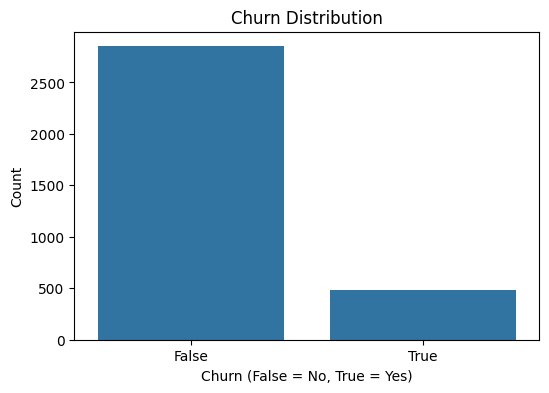

In [5]:
# Analyzing the target variable 'churn'
# Visualizing the distribution of the target variable, 'churn', to understand class balance and inform class imbalance strategies.
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (False = No, True = Yes)')
plt.ylabel('Count')
plt.show()

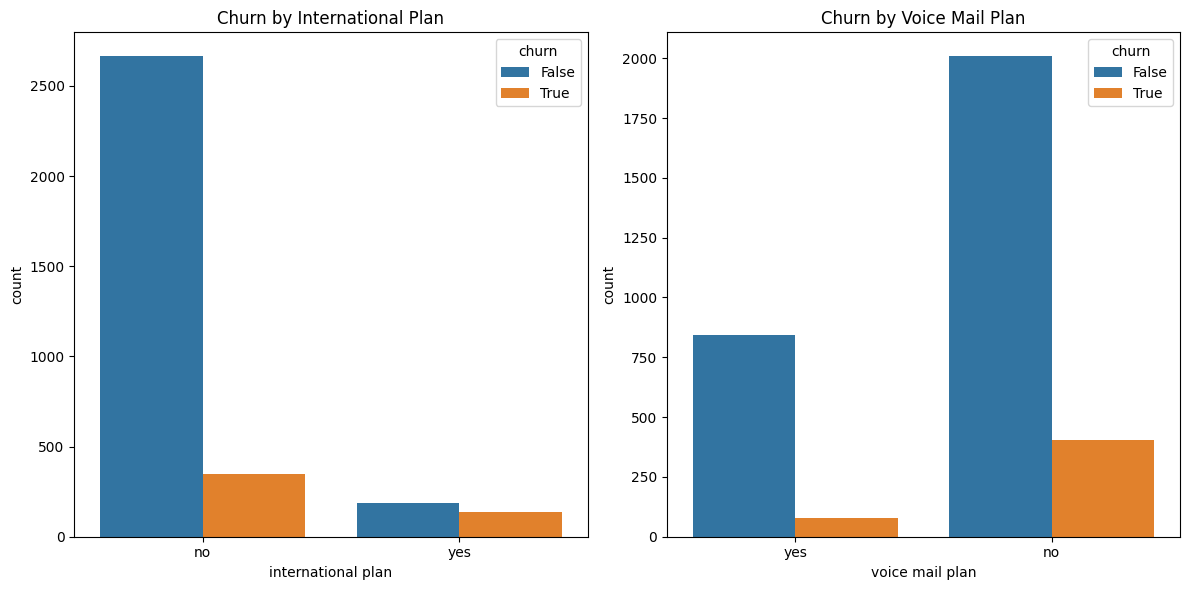

Churn Rate by International Plan:
 international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64
Churn Rate by Voice Mail Plan:
 voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


In [6]:
# Visualizing categorical features with respect to churn
# Examining the relationship between 'international_plan', 'voice_mail_plan', and 'churn' to identify any correlations.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')

plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()

# Calculating churn rates for each plan
# Provides a churn rate analysis for 'international_plan' and 'voice_mail_plan', guiding feature selection for modeling.
churn_rate_international = df.groupby('international plan')['churn'].mean()
churn_rate_voicemail = df.groupby('voice mail plan')['churn'].mean()
print('Churn Rate by International Plan:\n', churn_rate_international)
print('Churn Rate by Voice Mail Plan:\n', churn_rate_voicemail)

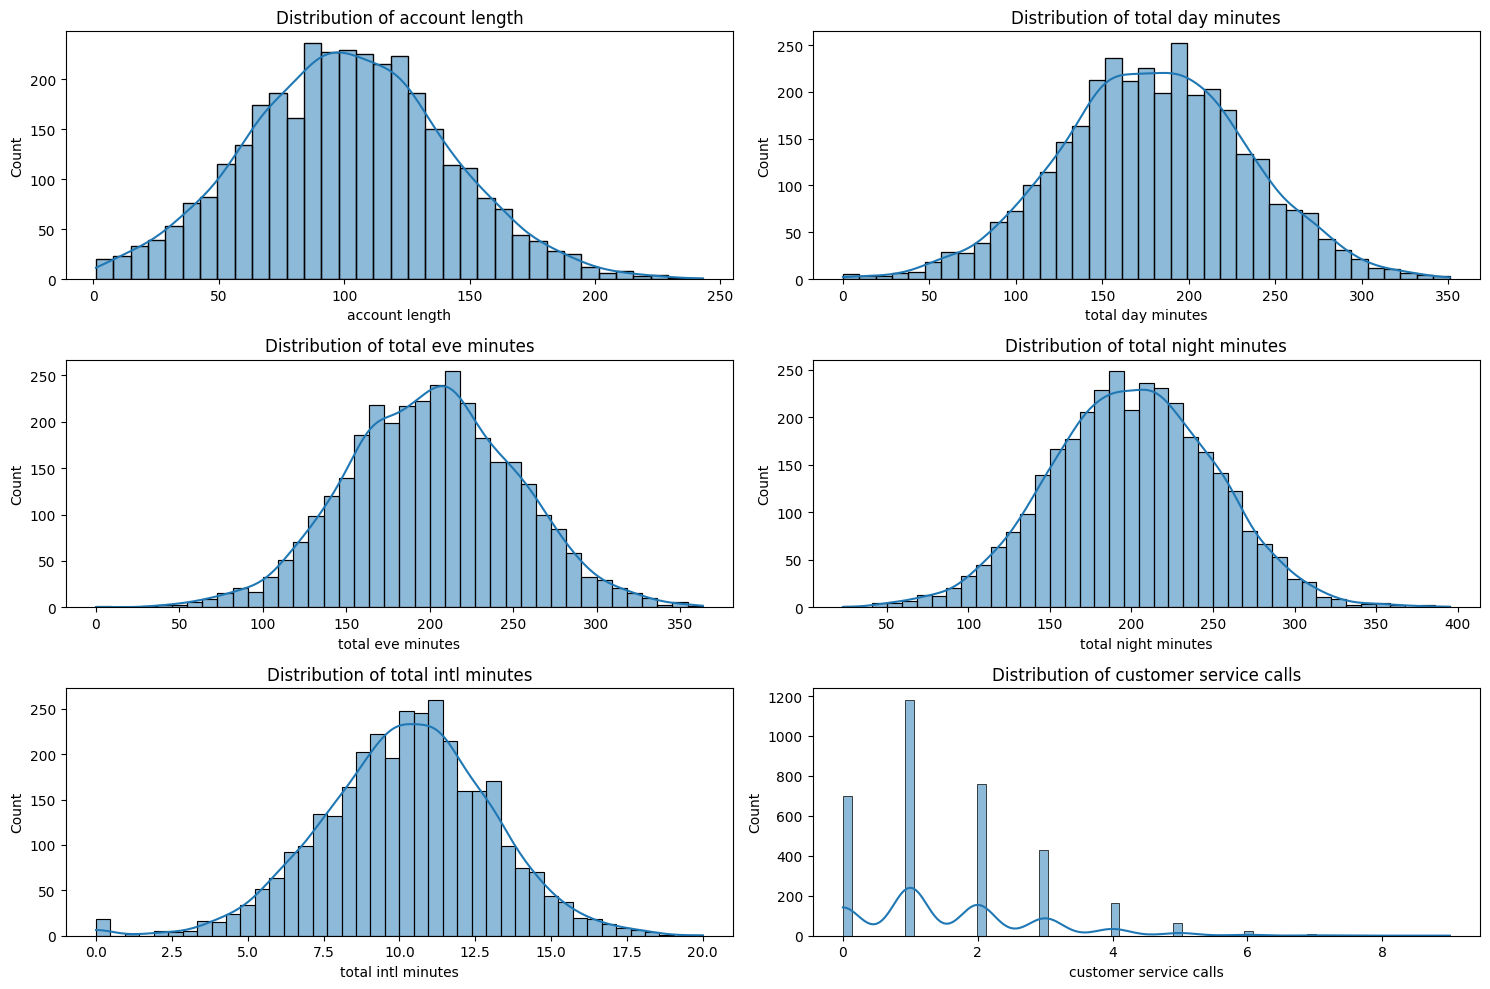

In [7]:
# Distribution analysis of key numerical features
# Explores individual distributions of primary numerical features, identifying patterns and potential predictors for churn.
numerical_columns = ['account length', 'total day minutes', 'total eve minutes', 
                     'total night minutes', 'total intl minutes', 'customer service calls']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

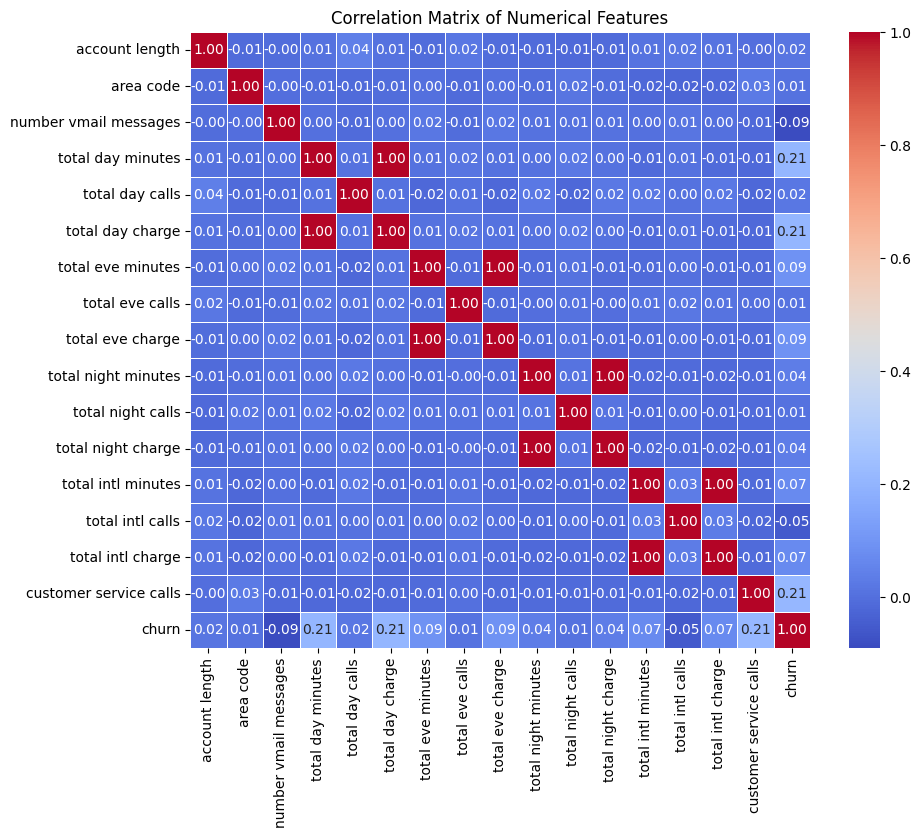

In [8]:
# Generating a correlation matrix
# Identifies correlations among numerical features to inform feature engineering, selection, and potential multicollinearity considerations.
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool']).copy()
numeric_df['churn'] = numeric_df['churn'].astype(int)
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix
# A visual representation to quickly identify strongly correlated features, guiding potential data transformations.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Preprocessing Code

In [10]:
# Preprocessing of the SyriaTel Customer Churn Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
data_path = "../customer-churn-classification/data/raw/telecom_churn_dataset.csv"
df = pd.read_csv(data_path)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# Formatting Column Names and Dropping Unnecessary Columns
# Standardizing column names and dropping irrelevant columns for consistency and focus on predictive features
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop(['phone_number', 'state'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [12]:
# Encoded Categorical Variables
# Encoding categorical variables (international_plan and voice_mail_plan) for model compatibility
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
# Verify encoding
df[['international_plan', 'voice_mail_plan']].head()

,international_plan,voice_mail_plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [18]:
# Feature Scaling and Data Splitting
# Scaling features and splitting data for training and testing
# Preparing target and features
X = df.drop('churn', axis=1)
y = df['churn']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Concatenate scaled features with target
df_preprocessed = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

# Save the preprocessed dataset for reference
joblib.dump(df_preprocessed, '../customer-churn-classification/data/processed/preprocessed_data.pkl')

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save the splits
joblib.dump(X_train, '../customer-churn-classification/data/processed/X_train.pkl')
joblib.dump(X_test, '../customer-churn-classification/data/processed/X_test.pkl')
joblib.dump(y_train, '../customer-churn-classification/data/processed/y_train.pkl')
joblib.dump(y_test, '../customer-churn-classification/data/processed/y_test.pkl')

['../customer-churn-classification/data/processed/y_test.pkl']

## Modeling and Evaluation Code

In [19]:
# Loading the saved data splits (Modeling and Evaluation)
import joblib

X_train = joblib.load('../customer-churn-classification/data/processed/X_train.pkl')
X_test = joblib.load('../customer-churn-classification/data/processed/X_test.pkl')
y_train = joblib.load('../customer-churn-classification/data/processed/y_train.pkl')
y_test = joblib.load('../customer-churn-classification/data/processed/y_test.pkl')

In [20]:
# Baseline Logistic Regression Model (Modeling and Evaluation)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix:
 [[554  12]
 [ 83  18]]


In [21]:
# Logistic Regression with Class Weights to handle imbalance (Modeling and Evaluation)
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train, y_train)
y_pred_balanced = log_reg_balanced.predict(X_test)

print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix with Class Weights:")
print(confusion_matrix(y_test, y_pred_balanced))

Classification Report with Class Weights:
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.78      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix with Class Weights:
[[444 122]
 [ 22  79]]


In [22]:
# Applying SMOTE for class imbalance (Modeling and Evaluation)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
churn
False    2284
True     2284
Name: count, dtype: int64


In [23]:
# Logistic Regression Model on SMOTE balanced data (Modeling and Evaluation)
model_smote = LogisticRegression(class_weight='balanced', random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix with SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

Classification Report with SMOTE:
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.78      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix with SMOTE:
[[442 124]
 [ 22  79]]


In [24]:
# Threshold Tuning (Modeling and Evaluation)
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]  # Probability for churn class
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

       False       0.96      0.68      0.80       566
        True       0.32      0.86      0.47       101

    accuracy                           0.71       667
   macro avg       0.64      0.77      0.63       667
weighted avg       0.87      0.71      0.75       667

Confusion Matrix with Adjusted Threshold:
[[384 182]
 [ 14  87]]


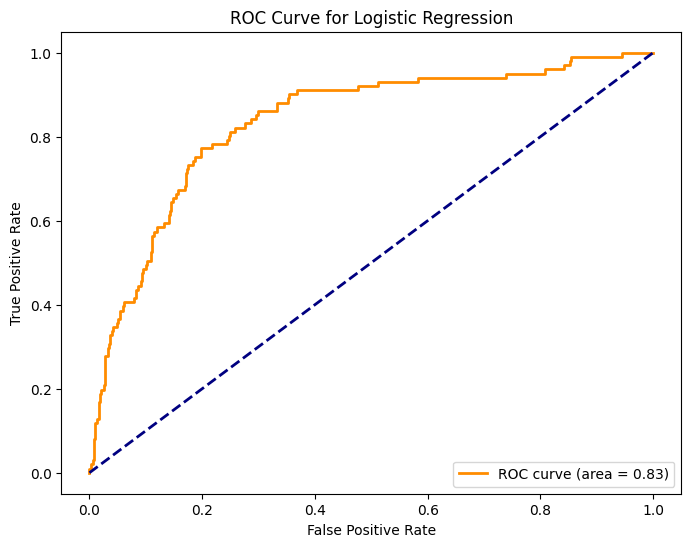

AUC Score: 0.8346919497603471


In [25]:
# ROC Curve and AUC for Logistic Regression (Modeling and Evaluation)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc}")

In [26]:
# Baseline Decision Tree Model (Modeling and Evaluation)
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dtree))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dtree))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667

Confusion Matrix for Decision Tree:
[[539  27]
 [ 27  74]]


In [27]:
# Hyperparameter tuning for Decision Tree: max_depth, min_samples_split, etc. (Modeling and Evaluation)
depths = [2, 5, 10, 15, 20, 30, None]
accuracy_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    accuracy_scores.append(tree.score(X_test, y_test))

In [28]:
# Retrained Decision Tree Model with Optimal Parameters (Modeling and Evaluation)
optimal_tree_model = DecisionTreeClassifier(max_depth=12, min_samples_split=5, 
                                            min_samples_leaf=5, max_features=14, 
                                            random_state=42)
optimal_tree_model.fit(X_train, y_train)
y_pred_optimal = optimal_tree_model.predict(X_test)

print("Classification Report for Optimal Decision Tree Model:")
print(classification_report(y_test, y_pred_optimal))
print("Confusion Matrix for Optimal Decision Tree Model:")
print(confusion_matrix(y_test, y_pred_optimal))

Classification Report for Optimal Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.83      0.72      0.77       101

    accuracy                           0.94       667
   macro avg       0.89      0.85      0.87       667
weighted avg       0.93      0.94      0.93       667

Confusion Matrix for Optimal Decision Tree Model:
[[551  15]
 [ 28  73]]


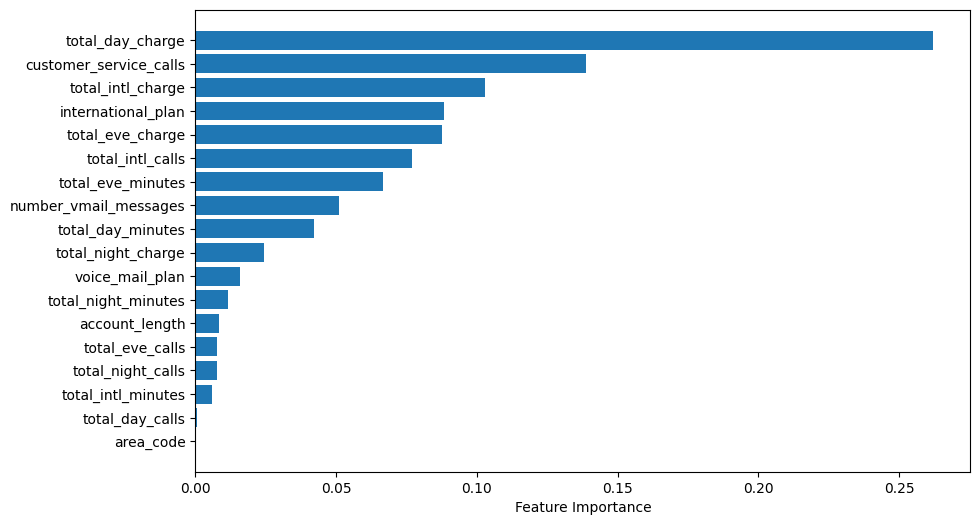

In [29]:
# Feature Importance Bar Chart (Creating Supporting Visualizations)
import pandas as pd
feature_names = df.drop('churn', axis=1).columns
feature_importances = optimal_tree_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

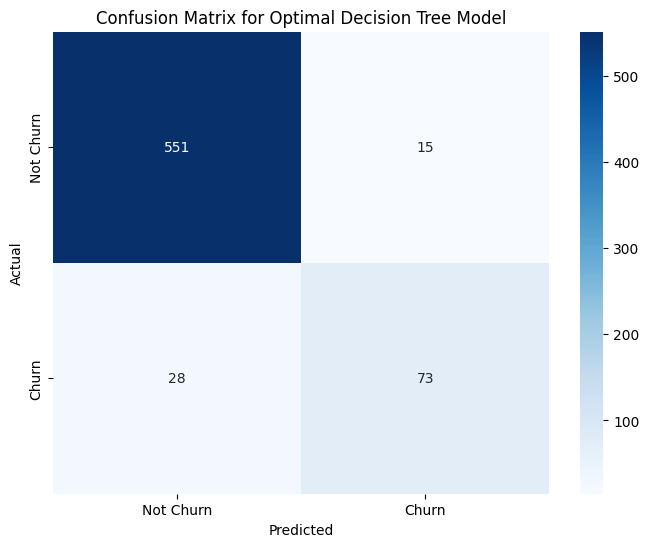

In [30]:
# Confusion Matrix Heatmap (Creating Supporting Visualizations)
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimal Decision Tree Model")
plt.show()

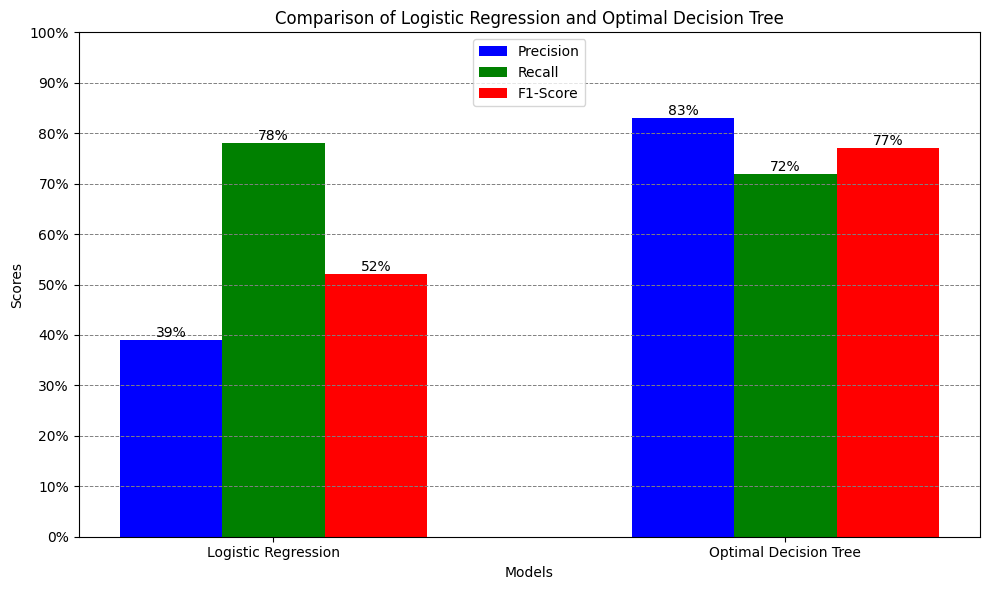

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

# performance metrics for Logistic Regression and Optimal Decision Tree
models = ['Logistic Regression', 'Optimal Decision Tree']
precision_scores = [0.39, 0.83]  # precision scores for each model
recall_scores = [0.78, 0.72]  # recall scores for each model
f1_scores = [0.52, 0.77]  # F1-scores for each model

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(index, precision_scores, bar_width, label='Precision', color='b')
bars2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='g')
bars3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1-Score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Optimal Decision Tree')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend(loc='upper center')

# formatting Y-axis as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.set_ylim(0, 1)

# adding values at the top of each bar
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.0%}',
            ha='center',
            va='bottom'
        )

add_values(bars1)
add_values(bars2)
add_values(bars3)

ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')

fig.tight_layout()
plt.show()


In [36]:
# Saving Final Models (Saving Final Models)
joblib.dump(optimal_tree_model, '../customer-churn-classification/models/optimized_decision_tree_model.pkl')
joblib.dump(logreg, '../customer-churn-classification/models/logistic_regression_model.pkl')

['../customer-churn-classification/models/logistic_regression_model.pkl']